In [1]:
import os
import re
import glob
import nibabel as nib

In [5]:
from fast_mri_view import *

In [7]:
from utils import *

In [11]:
path = '/dhc/home/shahryar.khorasani/ChariteNeurosurgery/niftis/mr623/t1c/t1c_ras.nii'

In [22]:
'/'.join(path.split('/')[:-1])

'/dhc/home/shahryar.khorasani/ChariteNeurosurgery/niftis/mr623/t1c'

In [15]:
scan_raw = subject_dir + '/' + modality + '/' + modality + '_ras.nii'
        input_dir = '/'.join(path.split('/')[:-1])
        apply_mask = 'fslmaths ' + input_scan + ' -mul ' + input_dir + '/BrainMask.nii.gz'    
        os.system(apply_mask)

'/dhc/home/shahryar.khorasani/ChariteNeurosurgery/niftis/mr623/t1c/t1c_ras.nii'

In [ ]:
def rigid_register(subject_dir, registration_reference='t1c'):        
        
        #rigid registration with fsl
    ref = subject_dir + '/' + registration_reference + '/' + registration_reference + '_brain' 
    for modality in os.listdir(subject_dir):
        if modality != registration_reference and modality != 'seg':
            scan_masked = subject_dir + '/' + modality + '/' + modality + '_brain'
            reg_scan = subject_dir + '/' + modality + '/' + modality + '_reg'
            affine_matrix = subject_dir + '/' + modality + '/' + modality + '_to_' + registration_reference + '_affine_matrix.mat'
            register = 'flirt -in ' + scan_masked + ' -ref ' + ref +  ' -out ' + reg_scan + ' -omat ' + affine_matrix 
            
            os.system(register)

In [ ]:
#playground ends

In [27]:
#convert dicom to nifti with freesurfer

#t1c
#dicom_input = '/home/Shahryar.Khorasani/netstore/tms/charite_scan_example/mr426/t1c/Study1/Series1/Image1.dcm'
#nifti_output = '/home/Shahryar.Khorasani/netstore/tms/charite_scan_example/mr426/t1c/t1c'

#t2f
dicom_input = '/home/Shahryar.Khorasani/netstore/tms/charite_scan_example/mr426/t2f/Study1/Series1/Image1.dcm'
nifti_output = '/home/Shahryar.Khorasani/netstore/tms/charite_scan_example/mr426/t2f/t1c'

convert = 'mri_convert -i ' + dicom_input + ' --in_type dicom --out_type nii -o ' + nifti_output + '.nii'  
os.system(convert)

0

In [28]:

# set FOV orientation to RAS+ with nibabel
scan = nib.load(nifti_output + '.nii')
scan = nib.as_closest_canonical(scan)
nifti_ras = nifti_output + '_ras.nii'
nib.save(scan, nifti_ras)

In [29]:
#brain extraction with ants

input_scan = nifti_ras

template0 = '/mnt/projects/charite-brains/derived/MICCAI2012_Multi_Atlas_Challenge_Data/T_template0.nii.gz'
template_cerebellum = '/mnt/projects/charite-brains/derived/MICCAI2012_Multi_Atlas_Challenge_Data/T_template0_BrainCerebellumProbabilityMask.nii.gz'
template_cerebellum_mask = '/mnt/projects/charite-brains/derived/MICCAI2012_Multi_Atlas_Challenge_Data/T_template0_BrainCerebellumRegistrationMask.nii.gz'

extract_brain = 'antsBrainExtraction.sh -d 3 -a ' + input_scan + ' -e ' + template0 + ' -m ' + template_cerebellum +' -f '+ template_cerebellum_mask + ' -c 3x1x2x3 -o ' + input_scan[:-4]
    
os.system(extract_brain)

0

In [ ]:
#rigid registration with fsl

scan_raw = 
scan_mask = 
scan_masked = 
reference_scan_masked = 
scan_registred = 

apply_mask = 'fslmaths ' + scan_raw + '-mul ' + scan_mask + scan_masked

register = 'flirt -in ' + scan_masked ' -ref ' + reference_scan_masked + ' -omat affine_matrix -out ' + scan_registred

os.system(apply_mask)
os.system(register)

'/home/Shahryar.Khorasani/netstore/tms/charite_scan_example/mr426/t1c/t1c_ras'

In [34]:
def skullstrip(subject_dir, list_of_modalities=['t1', 't1c', 't2', 't2f', 'flair']):
    #directory to atlas 
    template0 = '/mnt/projects/charite-brains/derived/MICCAI2012_Multi_Atlas_Challenge_Data/T_template0.nii.gz'
    template_cerebellum = '/mnt/projects/charite-brains/derived/MICCAI2012_Multi_Atlas_Challenge_Data/T_template0_BrainCerebellumProbabilityMask.nii.gz'
    template_cerebellum_mask = '/mnt/projects/charite-brains/derived/MICCAI2012_Multi_Atlas_Challenge_Data/T_template0_BrainCerebellumRegistrationMask.nii.gz'
    
    for modality in list_of_modalities:
        
        # convert dicom to nifti
        dicom_input =  subject_dir + '/' + modality + '/Study1/Series1/Image1.dcm'
        nifti_output = subject_dir + '/' + modality + '/' + modality 
    
        convert = 'mri_convert -i ' + dicom_input + ' --in_type dicom --out_type nii -o ' + nifti_output + '.nii'  
    
        os.system(convert)
        
        # set FOV orientation to RAS+ with nibabel
        scan = nib.load(nifti_output + '.nii')
        scan = nib.as_closest_canonical(scan)
        nifti_ras = nifti_output + '_ras.nii'
        nib.save(scan, nifti_ras)
                
        #brain extraction with ants

        input_scan = nifti_ras
        extract_brain = 'antsBrainExtraction.sh -d 3 -a ' + input_scan + ' -e ' + template0 + ' -m ' + template_cerebellum +' -f '+ template_cerebellum_mask + ' -c 3x1x2x3 -o ' + input_scan[:-4]
        
        os.system(extract_brain)
        
            
        scan_mask = input_scan[:-4] + 'BrainExtractionMask.nii.gz'
        scan_masked = input_scan[:-7] + 'brain'
        apply_mask = 'fslmaths ' + scan_raw + '-mul ' + scan_mask + scan_masked
        
        os.system(apply_mask)
        
def rigid_register(subject_dir, registration_reference='t1c')        
        
        #rigid registration with fsl
    ref = subject_dir + '/' + registration_reference + '/' + registration_reference    
    for modality in os.listdir(subject_dir):
        if modality != registration_reference:
            
            + '/' + reference_scan_masked + reference_scan_masked
            list_of_modalities = list_of_modalities - registration_reference
            register = 'flirt -in ' + scan_masked ' -ref ' + ref + ' -omat affine_matrix -out ' + scan_masked + '_registered'
            os.system(register)
    
    # next steps to be done:  
    # segment M1 with freesurfer
    # extract CST using TractSeg
    # apply registration to tumor, CST and M1 mask (and tms block) 
    # measure tumor-tract distance
    # measure M1 infiltration

In [1]:
def apply_mask(subject_dir):
    for mask in glob.glob(subject_dir + '/*/*BrainExtractionMask_val.nii.gz'):
        modality = mask.split('/')[7]
        scan_raw = subject_dir + '/' + modality + '/' + modality + '_ras.nii'
        scan_masked = subject_dir + '/' + modality + '/' + modality + '_brain'
        
        apply_mask = 'fslmaths ' + scan_raw + ' -mul ' + mask + ' ' + scan_masked    
        os.system(apply_mask)

In [5]:
def rigid_register(subject_dir, registration_reference='t1c'):        
        
        #rigid registration with fsl
    ref = subject_dir + '/' + registration_reference + '/' + registration_reference + '_brain' 
    for modality in os.listdir(subject_dir):
        if modality != registration_reference and modality != 'seg':
            scan_masked = subject_dir + '/' + modality + '/' + modality + '_brain'
            reg_scan = subject_dir + '/' + modality + '/' + modality + '_reg'
            affine_matrix = subject_dir + '/' + modality + '/' + modality + '_to_' + registration_reference + '_affine_matrix.mat'
            register = 'flirt -in ' + scan_masked + ' -ref ' + ref +  ' -out ' + reg_scan + ' -omat ' + affine_matrix 
            
            os.system(register)

In [74]:
apply_mask('/mnt/projects/charite-brains/original/niftis/mr403')

fslmaths /mnt/projects/charite-brains/original/niftis/mr403/t1c/t1c_ras.nii -mul /mnt/projects/charite-brains/original/niftis/mr403/t1c/t1cBrainExtractionMask_val.nii.gz /mnt/projects/charite-brains/original/niftis/mr403/t1c/t1c_brain
fslmaths /mnt/projects/charite-brains/original/niftis/mr403/flair/flair_ras.nii -mul /mnt/projects/charite-brains/original/niftis/mr403/flair/flairBrainExtractionMask_val.nii.gz /mnt/projects/charite-brains/original/niftis/mr403/flair/flair_brain
fslmaths /mnt/projects/charite-brains/original/niftis/mr403/t2f/t2f_ras.nii -mul /mnt/projects/charite-brains/original/niftis/mr403/t2f/t2fBrainExtractionMask_val.nii.gz /mnt/projects/charite-brains/original/niftis/mr403/t2f/t2f_brain


In [79]:
for subject in glob.glob('/mnt/projects/charite-brains/original/niftis/*'):
    try:
        apply_mask(subject)
    except os.error as e:
        print(subject, e)

In [ ]:
for subject in glob.glob('/mnt/projects/charite-brains/original/niftis/*'):
    try:
        rigid_register(subject)
    except os.error as e:
        print(e)

In [ ]:
rigid_register()

In [2]:
### running script for mr604, mr611, mr612, mr613, mr616, mr632

In [3]:
mr604 = '/dhc/groups/charite-brains/original/niftis/mr604/t1c/t1c_ras.nii'

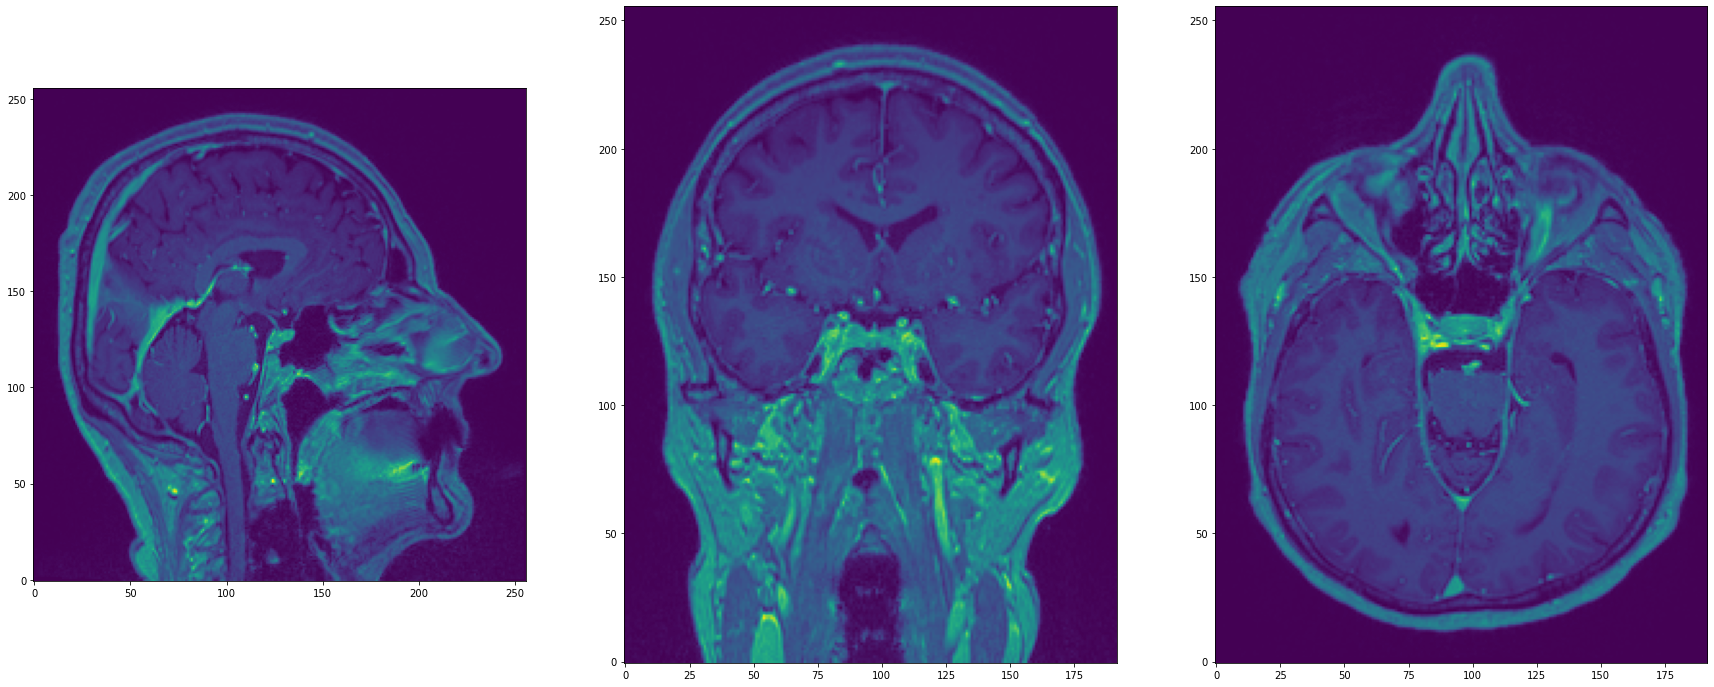

In [6]:
show_slices(mr604)

In [8]:
skull_strip(mr604)